In [2]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib notebook
import numpy as np
from pandas import ExcelFile
import seaborn as sns

In [14]:
import requests

# This is a protected data set hence needs headers for reading,
# Else it fails with 403: Forbidden request.
url = 'https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-1/table-1.xls/output.xls'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
req = requests.get(url, headers=header)

bytesIO = pd.io.common.BytesIO
original_data = pd.read_excel(bytesIO(req.content), engine='xlrd')


In [131]:
data = original_data.copy()

#clean data here
data = data[3:23]
new_data = data[['Table 1','Unnamed: 3','Unnamed: 5','Unnamed: 9','Unnamed: 11','Unnamed: 21']]
new_data = new_data.rename(columns = {'Table 1': 'Year',
                           'Unnamed: 3' : 'Violent crime rate' ,
                           'Unnamed: 9': 'Rape rate',
                           'Unnamed: 11': 'Robbery rate',
                           'Unnamed: 5' :'Murder rate',
                           'Unnamed: 21': 'Motor vehicle theft rate'})
new_data['Year'] = new_data['Year'].astype(str).str[:4].astype(int)
new_data.set_index(['Year'], inplace = True)
new_data



,Violent crime rate,Murder rate,Rape rate,Robbery rate,Motor vehicle theft rate
Year,,,,,
1997,611,6.8,35.9,186.2,505.7
1998,567.6,6.3,34.5,165.5,459.9
1999,523,5.7,32.8,150.1,422.5
2000,506.5,5.5,32,145,412.2
2001,504.5,5.6,31.8,148.5,430.5
2002,494.4,5.6,33.1,146.1,432.9
2003,475.8,5.7,32.3,142.5,433.7
2004,463.2,5.5,32.4,136.7,421.5
2005,469,5.6,31.8,140.8,416.8


<IPython.core.display.Javascript object>


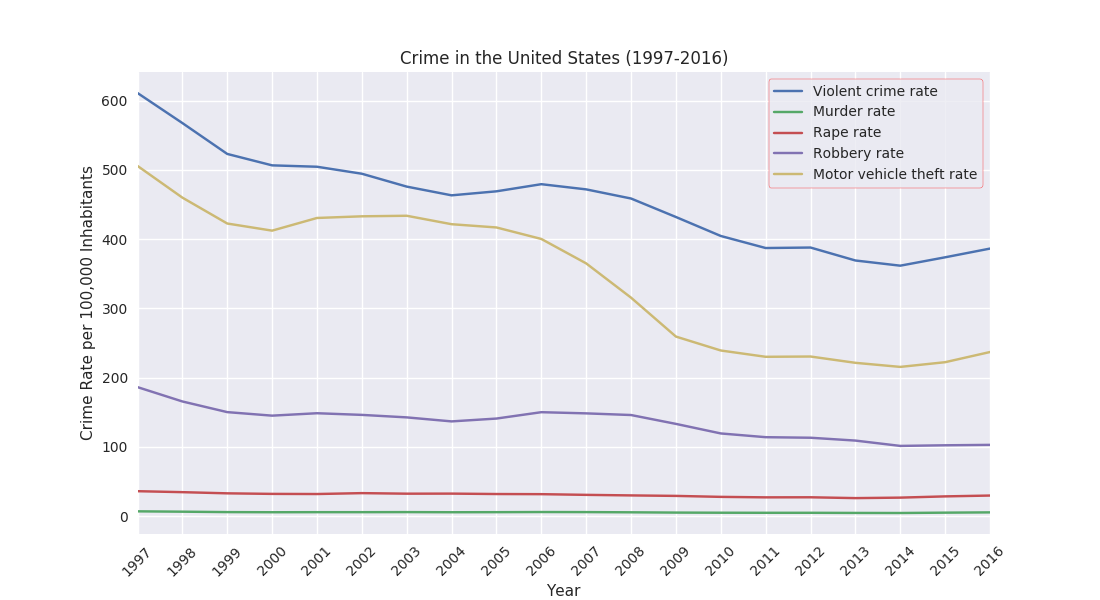

In [163]:
new_data.plot(y=["Violent crime rate","Murder rate",
                             "Rape rate", "Robbery rate","Motor vehicle theft rate"],
              figsize = (11,6),
             xticks = new_data.index,
             rot=45)
plt.legend(frameon = True).get_frame().set_edgecolor('r')
plt.xlabel('Year')
plt.ylabel('Crime Rate per 100,000 Inhabitants')
plt.title('Crime in the United States (1997-2016)')